In [2]:
import rioxarray as rxr
import rasterio as rio
import numpy as np
import xarray as xr
import geopandas as gpd
import os
import matplotlib.pyplot as plt
datadir = "c:/users/marianne/documents/data/csnow/"

In [23]:
mask = gpd.read_file("c:/users/marianne/documents/hma_high/hma_high_mask.shp")
mask['area'] = mask.geometry.area
idx = np.nanargmax(mask.area)
main = mask.loc[mask.index==idx]
fig,ax=plt.subplots()
mask.plot(ax=ax)
main.boundary.plot(ax=ax,color='red',alpha = 1)
plt.show()

C:\Users\Marianne\AppData\Local\Temp/ipykernel_21144/4187273042.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mask['area'] = mask.geometry.area
C:\Users\Marianne\AppData\Local\Temp/ipykernel_21144/4187273042.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  idx = np.nanargmax(mask.area)


In [21]:
files = os.listdir(datadir)
test = files[1]

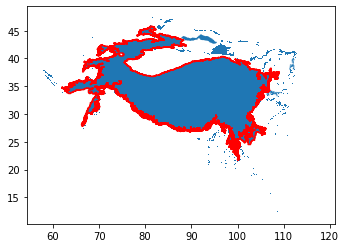

,zone,mean,geometry,area
2134,1,3780.931306,"POLYGON ((63.11519 34.12134, 63.11519 34.18191...",415.289139


In [24]:
data = rxr.open_rasterio(datadir+test)

C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\rioxarray\_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))
C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\rioxarray\_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))


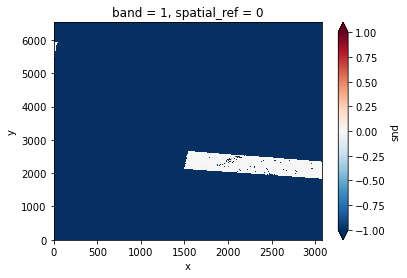

In [26]:
fig,ax=plt.subplots()
data.snd.plot(ax=ax,vmin=-1)
plt.show()

In [47]:
import netCDF4 as nc
fn = datadir + test
ds = nc.Dataset(fn)


In [50]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: -9999.0
    long_name: longitude
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (6528,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: -9999.0
    long_name: latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (3072,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 snd(lon, lat)
    _FillValue: -9999.0
    long_name: Snow_Depth
    standard_name: Snow_Depth
    units: m
unlimited dimensions: 
current shape = (6528, 3072)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 wet(lon, lat)
    _FillValue: -9999.0
    long_name: Wet_Snow
    standard_name: Wet_Snow
    units: 1
unlimited dimensions: 
current shape = (6528, 3072)
filling on


In [52]:
ds['lat']

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: -9999.0
    long_name: latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (3072,)
filling on

In [53]:
depth  = ds['snd'][:]


 ...]

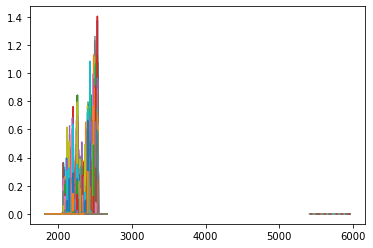

In [55]:
fig,ax=plt.subplots()
ax.contourf(depth)

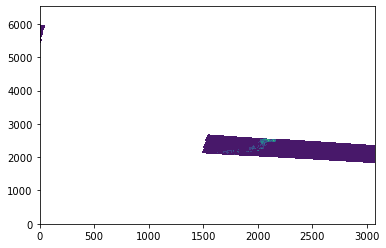

In [56]:
fig,ax=plt.subplots()
ax.contourf(depth)